## 3. Decaimiento nuclear del Cs¹³⁷

**1. Grafica**

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

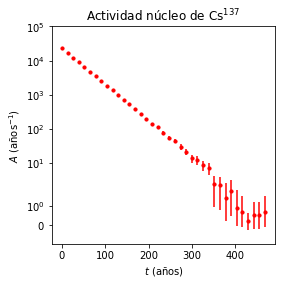

In [2]:
df = pd.read_csv("actividadCs.csv")
t = df["t(a)"].to_numpy()
A = df["A(dec./a)"].to_numpy()

fig, ax = plt.subplots(figsize = (4,4))
ax.set_yscale("symlog")
ax.scatter(t, A, s=10, color = "r")
ax.errorbar(t, A, yerr = np.sqrt(A), fmt = "none", color = "r")
ax.set_ylabel(r"$A$ (años$^{-1}$)")
ax.set_xlabel(r"$t$ (años)")
ax.set_title(r"Actividad núcleo de Cs$^{137}$")
ax.set_ylim(-1, 10**5)

plt.show()

**2. Ajuste de los datos.**

In [3]:
from lmfit.models import ExponentialModel

model = ExponentialModel()

pars = model.guess(A, x = t)
result = model.fit(A, pars, x = t)

print(result.fit_report())

A0 = result.params["amplitude"].value
σA0 = result.params["amplitude"].stderr

τ = result.params["decay"].value
στ = result.params["decay"].stderr

print("\n")
print(result.params)
print("\n")
print("A0 = "+f"{A0:1.0f}"+" +-"+f" {σA0:1.0f}")
print("tau = "+f"{τ:0.2f}"+" +-"+f" {στ:0.2f}")

print("\n")


[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 37
    # variables        = 2
    chi-square         = 8796.23068
    reduced chi-square = 251.320876
    Akaike info crit   = 206.432945
    Bayesian info crit = 209.654780
[[Variables]]
    amplitude:  23050.2048 +/- 13.4293318 (0.06%) (init = 23339.49)
    decay:      41.1264502 +/- 0.03937289 (0.10%) (init = 40.7267)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.589


Parameters([('amplitude', <Parameter 'amplitude', value=23050.204775520713 +/- 13.4, bounds=[-inf:inf]>), ('decay', <Parameter 'decay', value=41.12645015058039 +/- 0.0394, bounds=[-inf:inf]>)])


A0 = 23050 +- 13
tau = 41.13 +- 0.04





**3. Gráfica del ajuste**

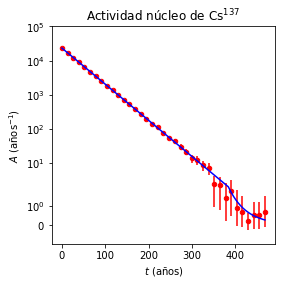

In [4]:
func = lambda t, amp, dec: amp*np.exp(-t/dec)

t_plot = np.linspace(t[0], t[-1], 1000)
A_plot = func(t_plot, A0, τ)

fig, ax = plt.subplots(figsize = (4,4))
ax.set_yscale("symlog")
ax.scatter(t, A, s=20, color = "r")
ax.errorbar(t, A, yerr = np.sqrt(A), fmt = "none", color = "r")
ax.plot(t_plot, A_plot, "-b")
ax.set_ylabel(r"$A$ (años$^{-1}$)")
ax.set_xlabel(r"$t$ (años)")
ax.set_title(r"Actividad núcleo de Cs$^{137}$")
ax.set_ylim(-1, 1e5)

plt.show()

**4. Gráfica lineal**

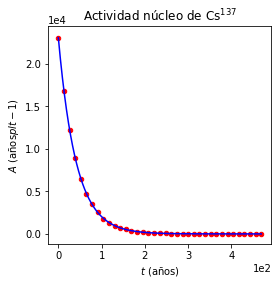

In [5]:
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(t, A, s=20, color = "r")
ax.errorbar(t, A, yerr = np.sqrt(A), fmt = "none", color = "r")
ax.plot(t_plot, A_plot, "-b")
ax.set_ylabel(r"$A$ (años$plt-1}$)")
ax.set_xlabel(r"$t$ (años)")
ax.set_title(r"Actividad núcleo de Cs$^{137}$")
ax.ticklabel_format(style = "sci", scilimits = [0,0])
# ax.set_ylim(-1, 10**5)

plt.show()

**5. Número total de núlecos al inicio de la simulación, en el tiempo t = 0**

Puesto que la actividad mide el número de núcleos decaídos por unidad de tiempo, con lo que el número de total de núcleos al inicio de la simulación ha de ser aproximadamente la integral de la curva ajustada desde 0 hasta \inf. Así, integrando la expresión dada en el enunciado

\begin{equation*}
\begin{split}
    N(t = 0) = N_0 =& \int_{0}^{\infty} A_0 \exp(-t/\tau) dt\,,\\
    =& A_0 \int_{0}^{\infty} \exp(-t/\tau) dt\,,\\
\end{split}1
\end{equation*}

y haciendo la sustitución

\begin{equation*}
\begin{split}
    x =& \frac{-t}{\tau}\,,\\
    dx =& - \frac{dt}{\tau}\,,\\
    dt =& -\tau dt\,,
\end{split}
\end{equation*}

tenemos que

\begin{equation*}
\begin{split}
    N_0 =& -A_0 \tau \int_{0}^{-\infty} \exp(x) dx\,,\\
    =& -A_0 \tau \Big[\exp(x)\Big]_0^{-\infty}\,,\\
    =& A_0 \tau\,.
\end{split}
\end{equation*}

Con lo que el valor del número de núcleos en el tiempo $N_0$ es

In [19]:
from uncertainties import umath
import uncertainties as un

A0_unc = un.ufloat(A0, σA0)
τ_unc = un.ufloat(τ, στ)# mol/L

print(A0_unc*τ_unc)

(9.480+/-0.011)e+05
